In [36]:
import cv2
import typing
import numpy as np
import matplotlib.pyplot as plt

from mltu.inferenceModel import OnnxInferenceModel
from mltu.utils.text_utils import ctc_decoder, get_cer
from mltu.configs import BaseModelConfigs

In [31]:
class ImageToWordModel(OnnxInferenceModel):
  def __init__(self, char_list: typing.Union[str, list], *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.char_list = char_list


  def predict(self, image: np.ndarray):
    image = cv2.resize(image, self.input_shapes[0][1:3][::-1])

    image_pred = np.expand_dims(image, axis=0).astype(np.float32)

    preds = self.model.run(self.output_names, {self.input_names[0]: image_pred})[0]

    text = ctc_decoder(preds, self.char_list)[0]

    return text

In [ ]:
configs = BaseModelConfigs.load('configs.yaml')
model = ImageToWordModel(model_path='model.onnx', char_list=configs.vocab)

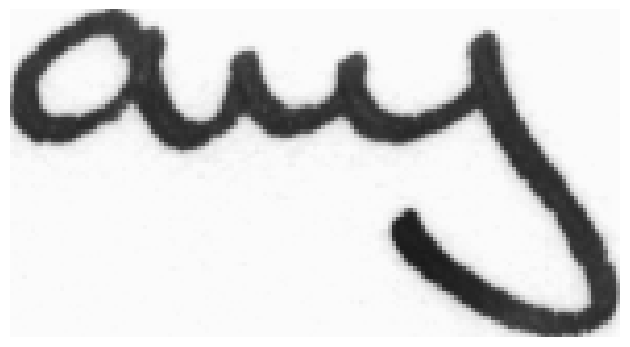

In [34]:
image_path = 'a01-000u-01-01.png'
image = cv2.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.tight_layout()

In [35]:
model.predict(image)

'any'